# Skript: 07_02_Lineare_Regression_boston_datensatz


### Lernziele:

- Umgang mit Beispieldaten in der Sklearn-ML-Bibliotheken
- Aufbereitung und verstehen: Boston-Datensatz / Pandas Data Frame
- 

#### Linear Regression / "Kleinste Quadrate"

#### Beispiel Boston - Datensatz

Datensatzquelle sklearn

In [2]:
# Module laden
import numpy as np
import pandas as pd
#import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Normalisierungsfunktionalität laden
from sklearn import preprocessing


### Boston - Datensatz

Der Boston Datensatz enthält Merkmale zu verschiedenen Wohngegenden in Boston mit den dazu gehörigen   
Wohnungspreisen.   
Ziel ist die Vorhersage von Wohnungspreisen in Abhängkeit von diesen Merkmalen.  

Die Merkmals-Attribute sowie die Ziel-Variable sind alle numerisch.

Die Input-Attribute:
- **CRIM** per capita crime rate by town
- **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** proportion of non-retail business acres per town
- **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX** nitric oxides concentration (parts per 10 million)
- **RM** average number of rooms per dwelling
- **AGE** proportion of owner-occupied units built prior to 1940
- **DIS** weighted distances to five Boston employment centres
- **RAD** index of accessibility to radial highways
- **TAX** full-value property-tax rate per 10,000 Dollar
- **PTRATIO** pupil-teacher ratio by town
- **B** 1000(Bk - **0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** % lower status of the population
- **MEDV** Median value of owner-occupied homes in $1000’s

### Daten laden

Der Datensatz wird als Beispiel-Datensatz in der Bibliothek **sklearn** mitgeliefert.  
Die Beispielsätze in dieser Bibliothek sind nicht als einfache CSV-Dateien abgelegt, sondern in einer   
sog. **Bunch-Struktur**.  Das ist technisch der Python-Typ Dictionary. 
In dieser Struktur sind z. B. Input- und Ziel-Variable schon getrennt voneinander. Man kann sie also getrennt über die Dictionary-Keys abgreifen.

In [29]:
#  Daten laden 
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

### Verstehen der Daten / Inhalte anschaulich machen / Bunch-Struktur der Beispieldaten auflösen

In [25]:
print("Keys: ",boston.keys())          # Die keys in der Dictionary - Struktur
print("Struktur: ",boston.data.shape)
print("Attribut-Namen: ",boston.feature_names)
print("Ziel-Variable: ", boston.target)

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Struktur:  (506, 13)
Attribut-Namen:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Ziel-Variable:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17

In [ ]:
# Die allgemeine Beschreibung
print(boston.DESCR)

In einer überschaulichen Tabelle kann man sich die Daten besser vorstellen.   
Deswegen überführen wir die Daten in eine Pandas - Tabelle.  


In [27]:
# Als pandas data frame aufbereiten / das muss nicht sein, es macht das Ganze aber anschaulicher


# Daten übernehmen
bos = pd.DataFrame(boston.data)

# Spalten-Namen aufbauen 
bos.columns = boston.feature_names

# Ziel-Variable hinzufügen
bos['PRICE'] = boston.target

# anzeigen
bos

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

### Schnell-Übersicht zu allen Werte-Verteilungen

In [35]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Erstellen Trainings- Test-Datenbestand / Funktion *train_test_split()*

Allgemein gilt folgende Variablen-Benennung:   
- X_train  &nbsp;&nbsp;     Input-Variablen Trainingssätze
- X_test   &nbsp;&nbsp;     Input-Variablen Testsätze
- y_train  &nbsp;&nbsp;     Ziel-Variable Trainingssätze
- y_test   &nbsp;&nbsp;     Ziel-Variable Testsätze

In [7]:
X = boston.data
y = boston.target
# Test-/Trainingssätze erstellen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Modell erstellen / trainieren

In [19]:
# Modell trainieren
lr = LinearRegression().fit(X_train, y_train)



Training set score: 0.95
Test set score: 0.61


### Modell bewerten / Scoring

In [ ]:
# Score-Wert für Trainingsdaten ermitteln
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))


# Score-Wert für Testaten entwickeln
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
                                            #Hoher Trainingsdaten-Score-Wert 
                                            #aber schlechter Testdaten-Score-Wert  -> offenbar übertrainiert

### Ridge regression  / Optimierung des Modells 

*Ridge-Regression* versucht Overfitting durch Regularisierung zu vermeiden.   
Die Koeffizienten (im Prinzip die Gewichte der Attribute) werden dabei so klein wie möglich gewält.   
Der Einfluss der einzelnen Attribute wird damit so gering wie möglich gehalten.  

Dieser Vorgang kann durch den sog. **alpha-Parameter** gesteuert werden:    
 &nbsp;&nbsp; &nbsp;&nbsp; Default = 1, erhöht man ihn, werden die Koeffizienten noch stärker gegen Null "gedrückt".

In [12]:
from sklearn.linear_model import Ridge

In [13]:
ridge = Ridge().fit(X_train, y_train)                # alpha-Paramter auf 1 (Default)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)     # alpha-Paramter auf 10 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)   # alpha-Paramter auf 0.1 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Die folgende Graphik stellt die Residuen dar.  
Und zwar jeweils mit verschieden gewählten alpha-Parametern.  

Man erkennt, dass bei alpha = 10 (gelbe Dreiecke) die Residuen sehr eng an der optimalen Modell-Linie liegen.

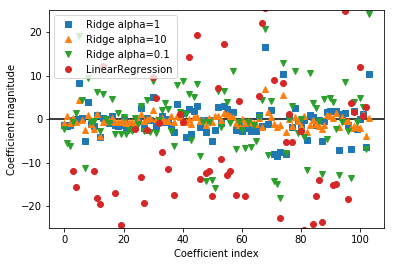

In [18]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

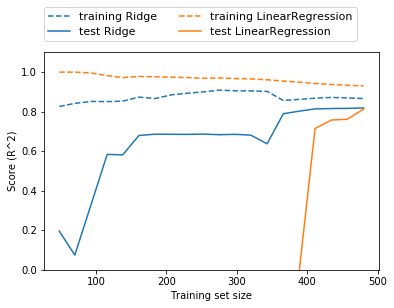

In [19]:
mglearn.plots.plot_ridge_n_samples()

### Lasso regression  

Die Lasso-Methode funktioniert ähnlich wie Ridge-Regression. Allerdings können die Koeffizienten (also Gewichte) einzelner Attribute auch Null werden. Damit fallen Attribute mit schwachem Einfluss auf das Gesamtergebnis 
(y, Zielvariable) komplett aus der Betrachung raus.  
**Parameter:**      
alpha (Default 1): --> reduzieren zum Minimieren des Underfitting    
 &nbsp;&nbsp; -> es sollen mehr Attribute berücksichtigt werden  
  &nbsp;&nbsp; &nbsp;&nbsp;                      Erhöhen hat den umgekehrten Effekt  
 max_iter:   --> maximale Anzahl der Iterationen bis zur Festellung des Ergebnisses                       

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))     # Anzeigen der Anzahl der berücksichtigten Attribute

Training set score: 0.72
Test set score: 0.55
Number of features used: 11


In [34]:
# Reduzieren von alpha. Erhöhen von max_iter um einer Warnung des System aus dem Weg zu gehen
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.77
Test set score: 0.63
Number of features used: 13


In [23]:
# Noch stärkeres Reduzieren von alpha. Erhöhen von max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96
